In [1]:
import os
import re
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.embeddings import Embedding

# Loading dataset

In [2]:
# Jangan lupa garis miring di akhir directory
def read_files(path):
    file_contents = list()
    filenames = os.listdir(path)
    
    for i in range(len(filenames)):
        with open(path+filenames[i], errors='ignore') as f:
            file_contents.append(f.read())
    
    return file_contents

# Jangan lupa garis miring di akhir directory
class_0 = read_files('../input/20-news-dataset/20news-18828/comp.graphics/')
class_1 = read_files('../input/20-news-dataset/20news-18828/rec.motorcycles/')
class_2 = read_files('../input/20-news-dataset/20news-18828/sci.med/')
class_3 = read_files('../input/20-news-dataset/20news-18828/talk.politics.misc/')

In [3]:
class_0[0]

'From: cesws@cc.newcastle.edu.au\nSubject: patches for SUNGKS4.1 ?\n\n\n\n\nDue to a number of bugs in GKS4.1 under SUNOS 4.1.3, I installed\npatches 100533-15 and 100755-01. Patch 100533-15 appears to\nwork fine and has fixed a number of problems. Patch 100755-01,\nhowever, which is required to fix a number of other annoying\nbugs, breaks with our applications.\n\nIs there a more recent revision of patch 10075?\n\nAny other ideas?\n\nScott Sloan                      email   cesws@cc.newcastle.edu.au\nUniversity of Newcastle          fax     +61 49 216991\nNSW\nAustralia\n'

# Semua text dari tiap class dimasukkan jadi satu array

In [4]:
print('Jumlah artikel di class_0:', len(class_0))
print('Jumlah artikel di class_1:', len(class_1))
print('Jumlah artikel di class_2:', len(class_2))
print('Jumlah artikel di class_3:', len(class_3))

Jumlah artikel di class_0: 973
Jumlah artikel di class_1: 994
Jumlah artikel di class_2: 990
Jumlah artikel di class_3: 775


In [5]:
all_texts = np.append(class_0, class_1)
all_texts = np.append(all_texts, class_2)
all_texts = np.append(all_texts, class_3)

print('Jumlah semua artikel:', len(all_texts))

Jumlah semua artikel: 3732


# Text preprocessing 1: Buat fungsi untuk membersihkan text

In [6]:
def clean(text):
    # Lowering letters
    text = text.lower()
    # Removing html tags
    text = re.sub('<[^>]*>', '', text)
    # Removing emails
    text = re.sub('\S*@\S*\s?', '', text)
    # Removing urls
    text = re.sub('https?://[A-Za-z0-9]','',text)
    # Removing numbers
    text = re.sub('[^a-zA-Z]',' ',text)
    # Tokenization
    word_tokens = word_tokenize(text)    
    # Joining words
    text = (' '.join(word_tokens))
    return text

In [7]:
all_cleaned_texts = np.array([clean(text) for text in tqdm(all_texts)])

100%|██████████| 3732/3732 [00:11<00:00, 318.82it/s]


In [8]:
all_cleaned_texts[0]

'from subject patches for sungks due to a number of bugs in gks under sunos i installed patches and patch appears to work fine and has fixed a number of problems patch however which is required to fix a number of other annoying bugs breaks with our applications is there a more recent revision of patch any other ideas scott sloan email university of newcastle fax nsw australia'

# Text preprocessing 2: Buat word-to-number mapping

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_cleaned_texts)

tokenizer.word_index

{'the': 1,
 'to': 2,
 'a': 3,
 'of': 4,
 'and': 5,
 'i': 6,
 'in': 7,
 'is': 8,
 'that': 9,
 'it': 10,
 'for': 11,
 'you': 12,
 'from': 13,
 'on': 14,
 's': 15,
 'this': 16,
 'be': 17,
 'have': 18,
 'are': 19,
 'not': 20,
 'with': 21,
 't': 22,
 'or': 23,
 'as': 24,
 'was': 25,
 'if': 26,
 'but': 27,
 'can': 28,
 'subject': 29,
 're': 30,
 'they': 31,
 'my': 32,
 'by': 33,
 'at': 34,
 'there': 35,
 'what': 36,
 'about': 37,
 'an': 38,
 'do': 39,
 'we': 40,
 'writes': 41,
 'would': 42,
 'all': 43,
 'will': 44,
 'article': 45,
 'one': 46,
 'has': 47,
 'any': 48,
 'your': 49,
 'so': 50,
 'some': 51,
 'no': 52,
 'me': 53,
 'out': 54,
 'don': 55,
 'more': 56,
 'he': 57,
 'like': 58,
 'who': 59,
 'people': 60,
 'which': 61,
 'just': 62,
 'm': 63,
 'get': 64,
 'up': 65,
 'd': 66,
 'other': 67,
 'know': 68,
 'their': 69,
 'when': 70,
 'than': 71,
 'been': 72,
 'had': 73,
 'how': 74,
 'also': 75,
 'were': 76,
 'think': 77,
 'them': 78,
 'only': 79,
 'time': 80,
 'use': 81,
 'image': 82,
 'new':

In [10]:
# Angka ini nanti dipakai sebagai input shape dari layer embedding.
len(tokenizer.word_index)

35511

In [11]:
all_encoded_texts = tokenizer.texts_to_sequences(all_cleaned_texts)

all_encoded_texts[0]

[13,
 29,
 3157,
 11,
 23227,
 550,
 2,
 3,
 160,
 4,
 2458,
 7,
 7793,
 233,
 7794,
 6,
 3158,
 3157,
 5,
 2300,
 1266,
 2,
 136,
 664,
 5,
 47,
 3253,
 3,
 160,
 4,
 302,
 2300,
 293,
 61,
 8,
 1046,
 2,
 1829,
 3,
 160,
 4,
 67,
 4528,
 2458,
 4060,
 21,
 149,
 1027,
 8,
 35,
 3,
 56,
 887,
 6827,
 4,
 2300,
 48,
 67,
 698,
 1587,
 3824,
 333,
 183,
 4,
 17302,
 393,
 11033,
 2115]

In [12]:
text_lengths = list()
for i in range(len(all_encoded_texts)):
    text_lengths.append(len(all_encoded_texts[i]))

print(np.min(text_lengths))  # Terpendek
print(np.max(text_lengths))  # Terpanjang
print(np.mean(text_lengths)) # Panjang rata-rata

4
9624
270.5661843515541


# Text preprocessing 3: Samain panjang text nya

In [13]:
all_encoded_texts = sequence.pad_sequences(all_encoded_texts, maxlen=270)
all_encoded_texts

array([[    0,     0,     0, ...,   393, 11033,  2115],
       [    0,     0,    13, ...,     2,    49,  7275],
       [    0,     0,     0, ...,    16,   651,  1545],
       ...,
       [    0,     0,     0, ...,    32,  1409,    15],
       [    0,     0,     0, ..., 35510,  2439,  2553],
       [    0,     0,     0, ...,  1098,  5806,  7759]], dtype=int32)

# Label preprocessing

In [14]:
labels_0 = np.array([0] * len(class_0))
labels_1 = np.array([1] * len(class_1))
labels_2 = np.array([2] * len(class_2))
labels_3 = np.array([3] * len(class_3))

In [15]:
all_labels = np.append(labels_0, labels_1)
all_labels = np.append(all_labels, labels_2)
all_labels = np.append(all_labels, labels_3)

all_labels.shape

(3732,)

# Convert labelnya jadi one hot

In [16]:
all_labels

array([0, 0, 0, ..., 3, 3, 3])

In [17]:
all_labels = all_labels[:, np.newaxis]
one_hot_encoder = OneHotEncoder(sparse=False)
all_labels = one_hot_encoder.fit_transform(all_labels)

In [18]:
all_labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

# Train test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(all_encoded_texts, 
                                                    all_labels, 
                                                    test_size=0.2, 
                                                    random_state=11)

print('Shape X_train\t:', X_train.shape)
print('Shape X_test\t:', X_test.shape)
print()
print('Shape y_train\t:', y_train.shape)
print('Shape y_test\t:', y_test.shape)

Shape X_train	: (2985, 270)
Shape X_test	: (747, 270)

Shape y_train	: (2985, 4)
Shape y_test	: (747, 4)


# Buat LSTM-based model nya

In [20]:
tf.random.set_seed(99)

In [21]:
model = Sequential()
model.add(Embedding(input_dim=35512, output_dim=32, input_length=270))
model.add(Dropout(0.3))
model.add(LSTM(200))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 270, 32)           1136384   
_________________________________________________________________
dropout (Dropout)            (None, 270, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 200)               186400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 804       
Total params: 1,323,588
Trainable params: 1,323,588
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, 
                    epochs=5, batch_size=64, 
                    validation_data=(X_test, y_test))

Epoch 1/5
47/47 [==============================] - 2s 49ms/step - loss: 1.6104 - accuracy: 0.3186 - val_loss: 1.3073 - val_accuracy: 0.4552
Epoch 2/5
47/47 [==============================] - 2s 33ms/step - loss: 1.2513 - accuracy: 0.5645 - val_loss: 1.2250 - val_accuracy: 0.4110
Epoch 3/5
47/47 [==============================] - 2s 33ms/step - loss: 1.0110 - accuracy: 0.6533 - val_loss: 1.1306 - val_accuracy: 0.4900
Epoch 4/5
47/47 [==============================] - 2s 33ms/step - loss: 0.8204 - accuracy: 0.7112 - val_loss: 0.7516 - val_accuracy: 0.7523
Epoch 5/5
47/47 [==============================] - 2s 33ms/step - loss: 0.4142 - accuracy: 0.8918 - val_loss: 0.5374 - val_accuracy: 0.8260


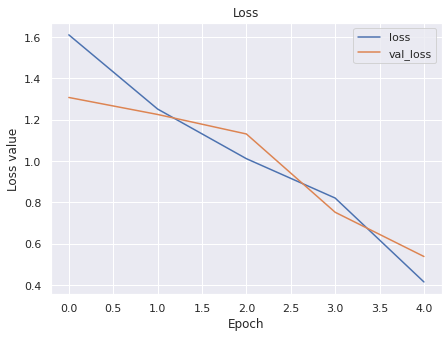

In [25]:
plt.figure(figsize=(7,5))
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

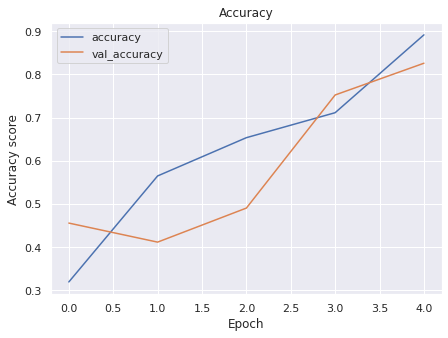

In [26]:
plt.figure(figsize=(7,5))
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy score')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

# Testing

In [27]:
def preprocess_text(text):
    text = clean(text)
    encoded_text = tokenizer.texts_to_sequences([text])
    same_length_text = sequence.pad_sequences(encoded_text, maxlen=270)
    return same_length_text

In [28]:
#https://www.usnews.com/news/politics/articles/2020-12-01/trump-teases-2024-run-at-white-house-christmas-party
model.predict(preprocess_text('the video of Trump\'s appearance Tuesday was streamed live on Facebook by one attendee, Pam Pollard, who is national committeewoman for the Oklahoma GOP. It showed dozens of people crammed into the broad Cross Hall of the White House state floor, standing closely together. Many seen in the video were not wearing masks.\
The Trumps began hosting holiday receptions this week, intent on celebrating a final season before Trump leaves office on Jan. 20. According to social media postings reviewed by The Associated Press, the events have featured large crowds of often maskless attendees gathered indoors — violating the very public health guidance the U.S. government has pressed the nation to follow this holiday season as cases of COVID-19 skyrocket across the country.\
White House press secretary Kayleigh McEnany on Wednesday defended the Trumps\' decision to host the parties. She noted that the guest lists are smaller than past years, hand sanitizer is made available to guests and social distancing is encouraged.\
“So you know if you can loot businesses, burn down buildings, engage in protest, you can also go to a Christmas party,” said McEnany, who noted that Trumps also plan to host Hanukkah celebrations.\
In the video, Trump is heard continuing to air baseless allegations of election fraud to explain his defeat by President-elect Joe Biden despite his attorney general, William Barr, telling the AP earlier Tuesday that the Justice Department had not uncovered evidence of widespread voter fraud and had seen nothing that would change the outcome of the 2020 presidential election. Coughing can be heard from the audience as Trump addressed the gathering.'))

array([[0.06488224, 0.0614203 , 0.37866637, 0.49503106]], dtype=float32)

In [29]:
#https://en.wikipedia.org/wiki/Computer_graphics_(computer_science)#:~:text=Computer%20graphics%20is%20a%20sub,dimensional%20graphics%20and%20image%20processing.
model.predict(preprocess_text('Computer graphics studies the manipulation of visual and geometric information using computational techniques. It focuses on the mathematical and computational foundations of image generation and processing rather than purely aesthetic issues. Computer graphics is often differentiated from the field of visualization, although the two fields have many similarities.'))

array([[0.57531375, 0.20326519, 0.09715517, 0.12426592]], dtype=float32)